#### Import the python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Reading the dataset

In [2]:
cars_data = pd.read_csv("car_price.csv")

In [3]:
cars = cars_data.copy(deep=True)

In [4]:
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Summary of a DataFrame's data types, column names, and non-null values

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Summary of the distribution of a numerical dataset. Output includes the count of non-null values, the mean, the standard deviation, the minimum value, the 25th percentile, the median (50th percentile), the 75th percentile, and the maximum value

In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data cleaning
#### Splitting company name from the car name column as the difference in the price of particular car models of the same company will have little effect on the price. 
#### Hence considering the company name as the car itself

In [7]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Checking if there are any errors in the company name

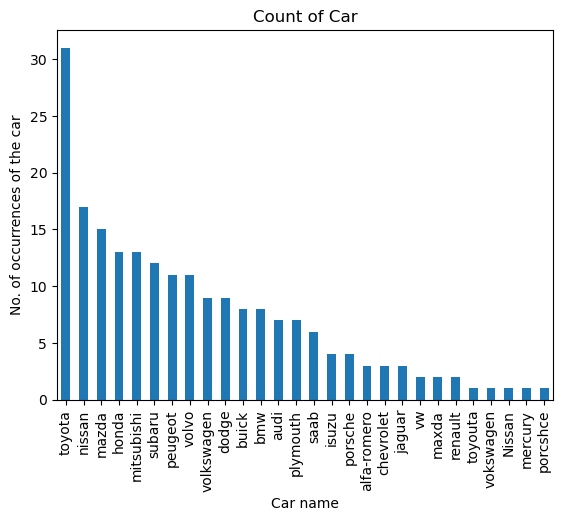

In [8]:
cars['CompanyName'].value_counts().plot(kind="bar")
plt.xlabel("Car name")
plt.ylabel("No. of occurrences of the car")
plt.title("Count of Car")
plt.show()

### We observe a few spelling mistakes in the company name. I.e,
#### - maxda = mazda
#### - Nissan = nissan
#### - porsche = porcshce
#### - toyota = toyouta
#### - vokswagen = volkswagen = vw

### It can also be checked using the unique() function

In [9]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Correcting the spelling errors

In [10]:
cars['CompanyName'] = cars['CompanyName'].replace('maxda',"mazda")
cars['CompanyName'] = cars['CompanyName'].replace('nissan',"Nissan")
cars['CompanyName'] = cars['CompanyName'].replace('porcshce',"porsche")
cars['CompanyName'] = cars['CompanyName'].replace('toyouta',"toyota")
cars['CompanyName'] = cars['CompanyName'].replace('vokswagen',"volkswagen")
cars['CompanyName'] = cars['CompanyName'].replace('vw',"volkswagen")

In [11]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

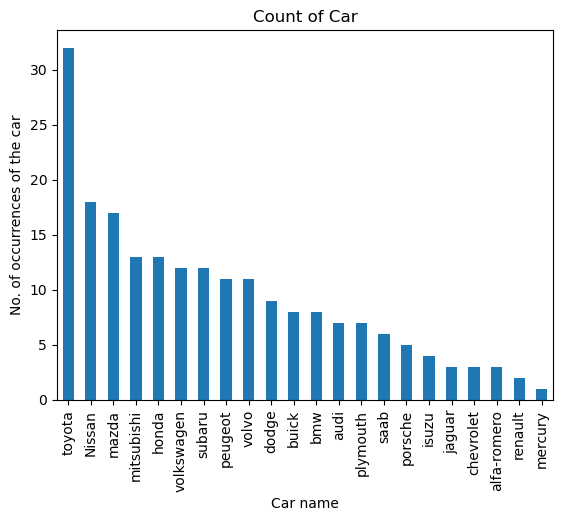

In [12]:
cars['CompanyName'].value_counts().plot(kind="bar")
plt.xlabel("Car name")
plt.ylabel("No. of occurrences of the car")
plt.title("Count of Car")
plt.show()

#### Checking for any duplicates and null values

In [13]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [94]:
cars.isna()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,curbweight_interval
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Converting the ratio data type to interval data type. 

In [14]:
ratio_data = cars['curbweight'].values

In [15]:
log_data = np.log(ratio_data)

In [16]:
interval_data = log_data - np.mean(log_data)

In [17]:
cars['curbweight_interval'] = interval_data

In [18]:
print(cars['curbweight_interval'])

0      0.016838
1      0.016838
2      0.119330
3     -0.069602
4      0.119684
         ...   
200    0.164013
201    0.196343
202    0.184134
203    0.249979
204    0.200598
Name: curbweight_interval, Length: 205, dtype: float64


In [93]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'curbweight_interval'],
      dtype='object')

### Data Visualizations
#### Cheking for the range of the price using the distribution plot for price

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


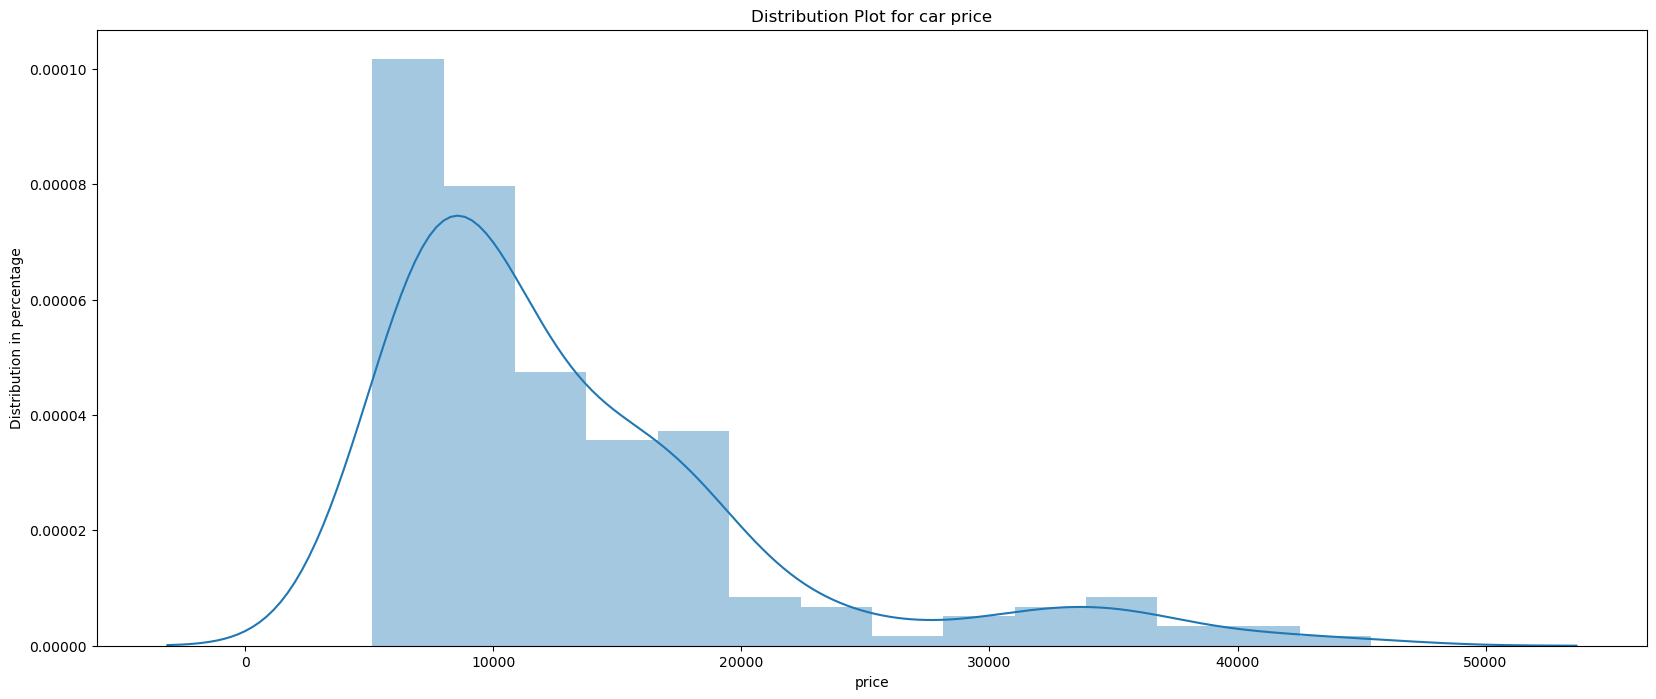

In [19]:
plt.figure(figsize=(20,8))
plt.title('Distribution Plot for car price')
plt.xlabel("Car price")
plt.ylabel("Distribution in percentage")
sns.distplot(cars.price)
plt.show()

#### Plotting a box plot to get the average range and to check if there are any outliers present

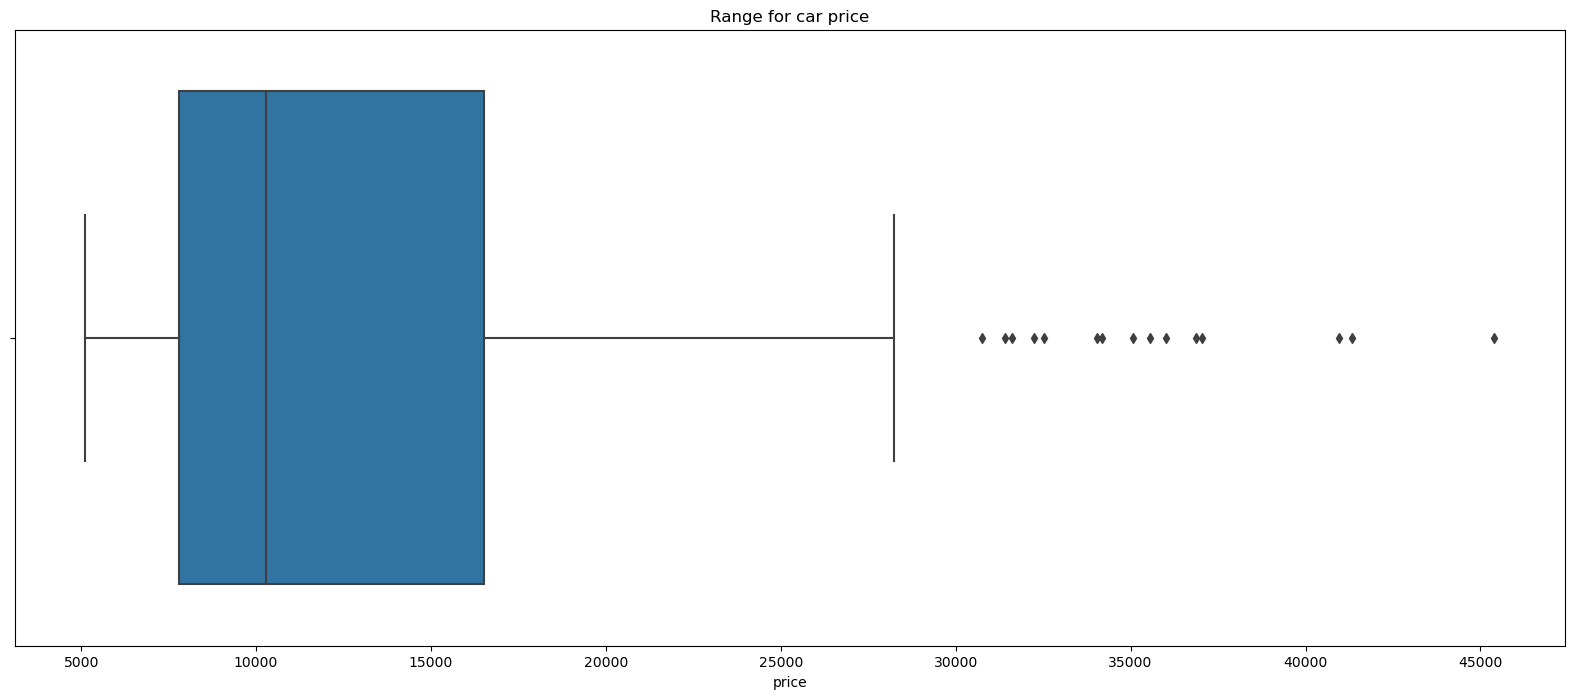

In [20]:
plt.figure(figsize=(20,8))
plt.title('Range for car price')
sns.boxplot(x=cars.price)
plt.show()

In [21]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

### Observations :
#### 1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
#### 2.There is a significant difference between the mean and the median of the price distribution.
#### 3.The data points are far spread out from the mean, which indicates a high variance in the car prices.(75% of the prices are below 16,500, whereas the remaining 25% are between 16,500 and 45,400.)

### Visualising Categorical Data 

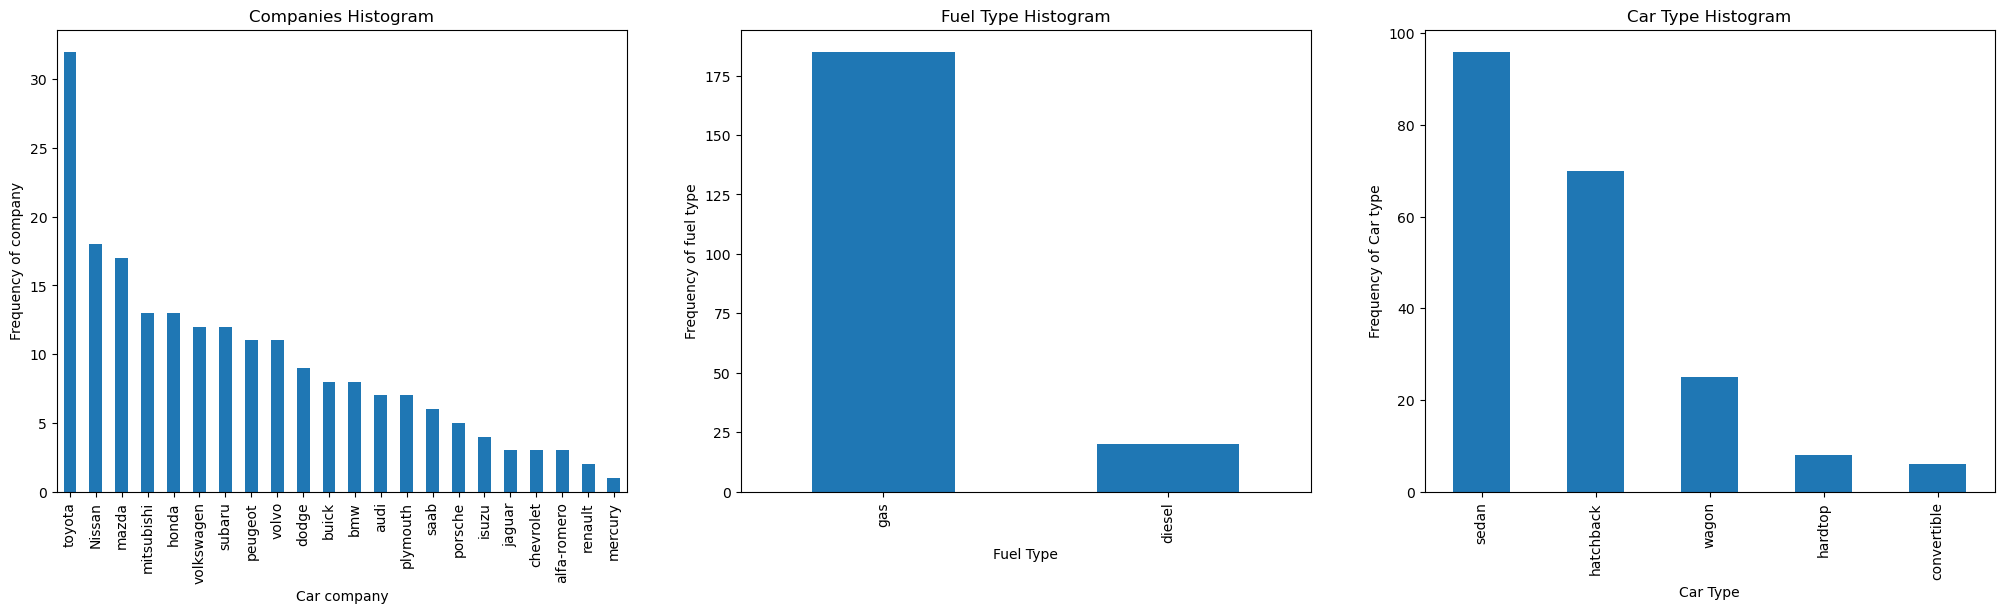

In [23]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind="bar")
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind="bar")
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind="bar")
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

### Observation: 
#### 1. Toyota seemed to be favored car company
#### 2. The number of gas fueled cars are more than diesel
#### 3. Sedan is the top car type prefered.

### Checking for different features of the cars and its relation to the price. This will answer the research questions,
#### 1.	Can we predict the price of a car based on its features, such as engine size, mileage, and type of transmission?
#### 2.	The relation and variance between city mpg and highway mpg. How it affects the performance of the car?
#### 3.	How does the car's body type (e.g., sedan, SUV, hatchback) affect its price and other features?

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Engine Type Histogram'}, xlabel='enginetype', ylabel='count'>

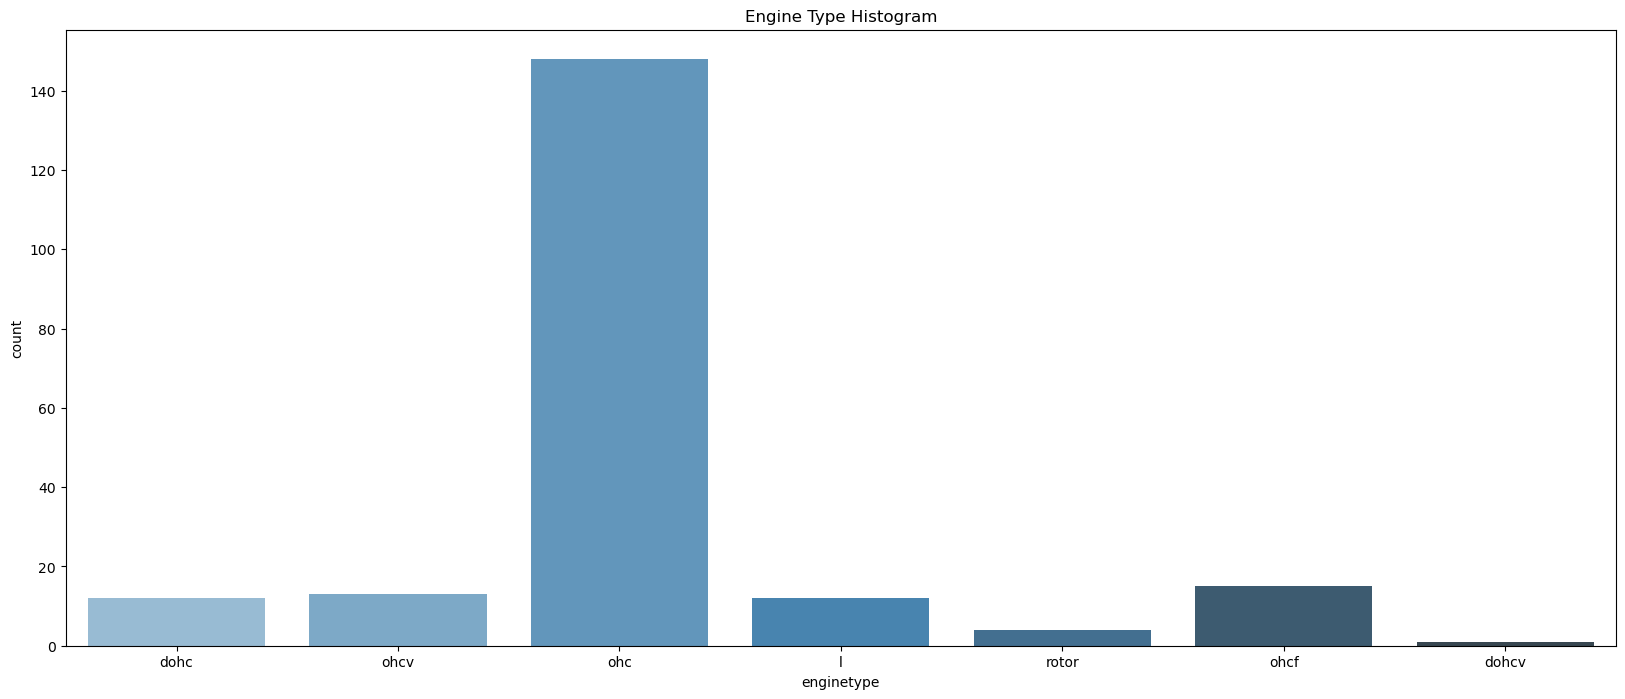

In [24]:
plt.figure(figsize=(20,8))

plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

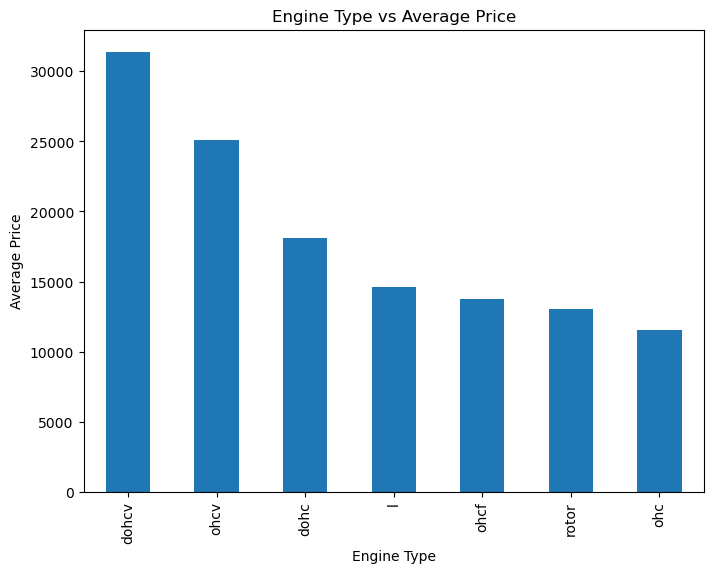

In [25]:
df = cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Engine Type vs Average Price')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Average Price')
plt.show()

### Observation:
#### 1. ohc Engine type seems to be most favored type.
#### 2. dohcv has the highest price range, while ohc has lowest, dohc, I and ohcf have the low price range.

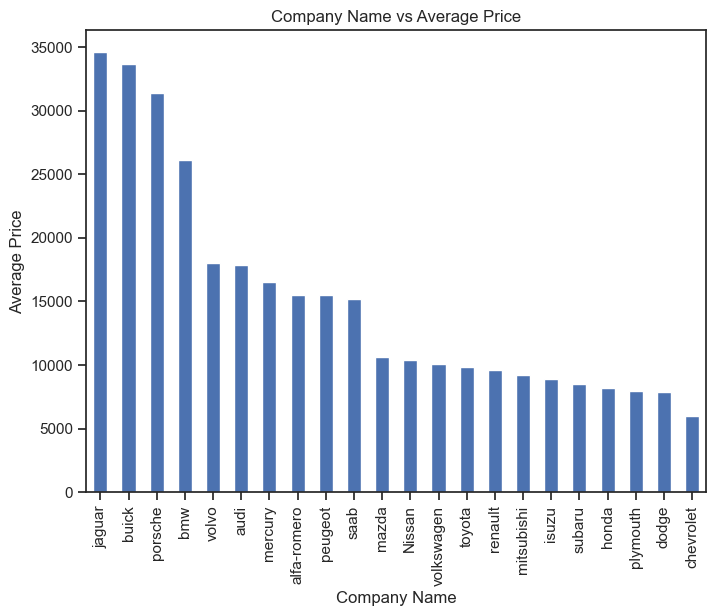

In [95]:
df = cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Company Name vs Average Price')
ax.set_xlabel('Company Name')
ax.set_ylabel('Average Price')
plt.show()

### Observation:
#### 1. Jaguar and Buick seem to have highest average price.
#### 2. Chevrolet has lowest price range.

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


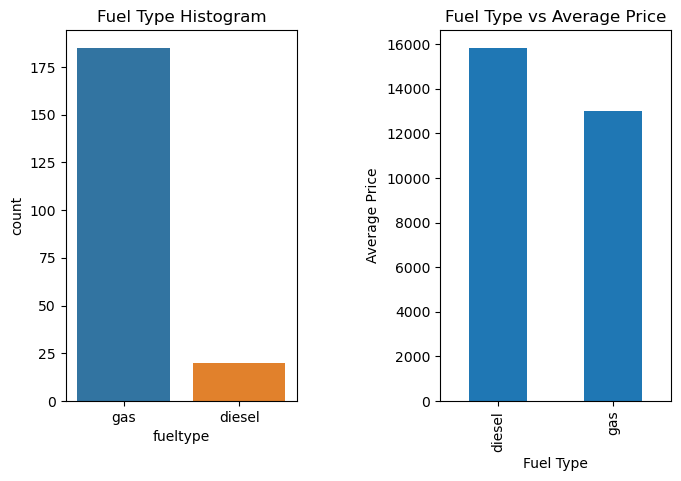

In [27]:
fig = plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(cars.fueltype)


plt.subplot(1,2,2)
df = cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Fuel Type vs Average Price')
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Average Price')

fig.tight_layout(pad = 5.0)
plt.show()

### Observation:
#### 1. Diesel has higher average price than gas.
#### 2. Cars using gas fuel are more preferred.

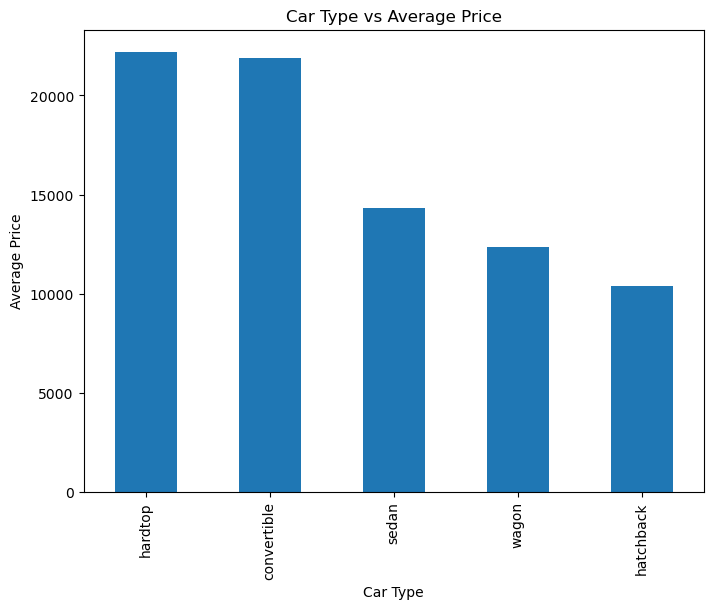

In [28]:
df = cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Car Type vs Average Price')
ax.set_xlabel('Car Type')
ax.set_ylabel('Average Price')
plt.show()

### Observation:
#### 1. Hardtop and Convertible have higher price range.
#### 2. Hatchback is the lowest price.

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


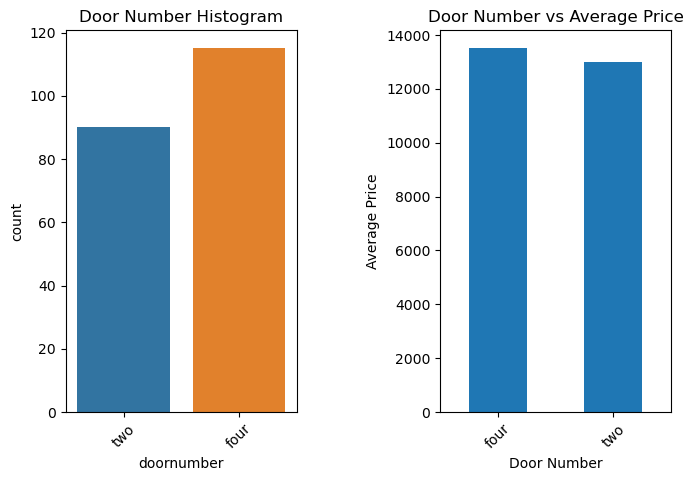

In [30]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df = cars.groupby(['doornumber'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Door Number vs Average Price')
ax.set_xlabel('Door Number')
ax.set_ylabel('Average Price')
plt.xticks(rotation=45)

fig.tight_layout(pad = 5.0)
plt.show()

### Observation:
#### 1. doornumber variable is not affecting the price much. There is no significant difference between the categories in it.
#### 2. However, we can see that the cars with two doors have lesser price.
#### 3. Cars with four doors is preferred than with two doors though the price for two doors is less.

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


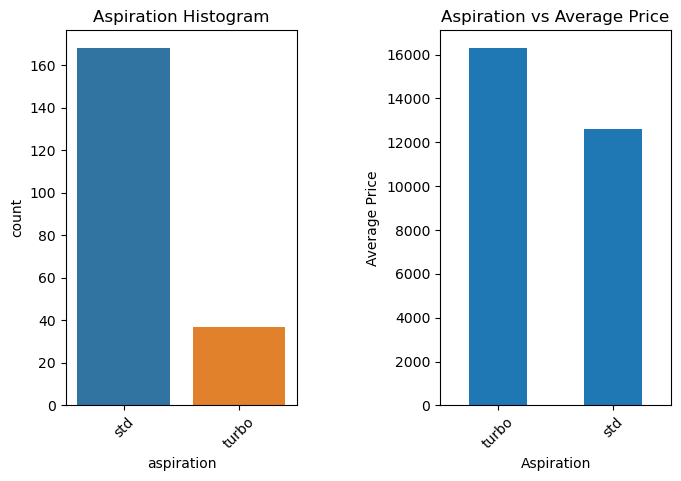

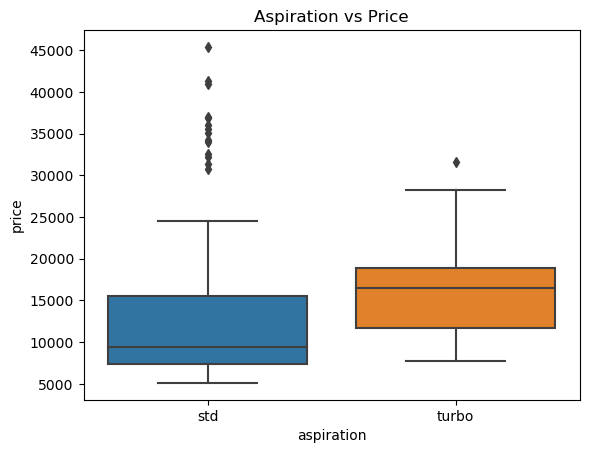

In [39]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df = cars.groupby(['aspiration'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Aspiration vs Average Price')
ax.set_xlabel('Aspiration')
ax.set_ylabel('Average Price')
plt.xticks(rotation=45)

fig.tight_layout(pad = 5.0)
plt.show()

plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price)
plt.show()

### Observation:
#### 1. aspiration with turbo have higher price range than the std (though it has some high values outside the whiskers)

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


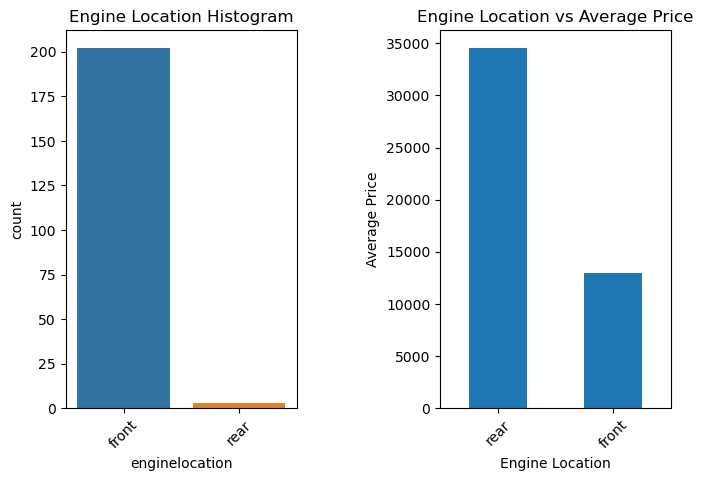

In [40]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Location Histogram')
sns.countplot(cars.enginelocation)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df = cars.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Engine Location vs Average Price')
ax.set_xlabel('Engine Location')
ax.set_ylabel('Average Price')
plt.xticks(rotation=45)

fig.tight_layout(pad = 5.0)
plt.show()

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


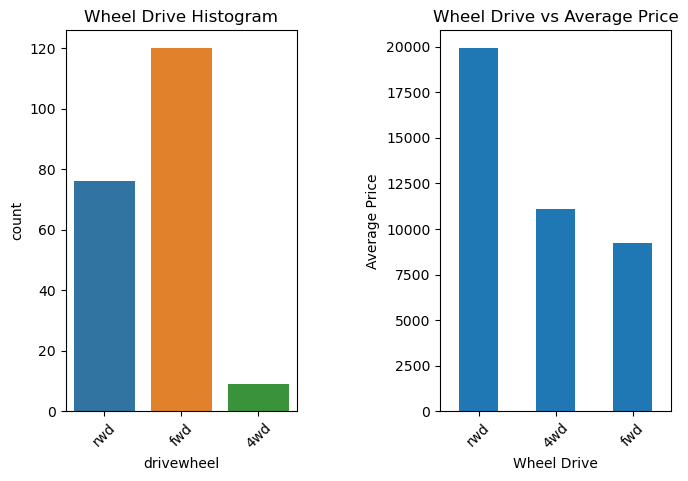

In [41]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Wheel Drive Histogram')
sns.countplot(cars.drivewheel)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df = cars.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Wheel Drive vs Average Price')
ax.set_xlabel('Wheel Drive')
ax.set_ylabel('Average Price')
plt.xticks(rotation=45)


fig.tight_layout(pad = 5.0)
plt.show()

### Observation:
#### 1. A very significant difference in drivewheel category is observed. Most high ranged cars prefer rear wheel.
#### 2. Preferred drive wheel is the front wheel drive.

C:\Users\KetakiS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


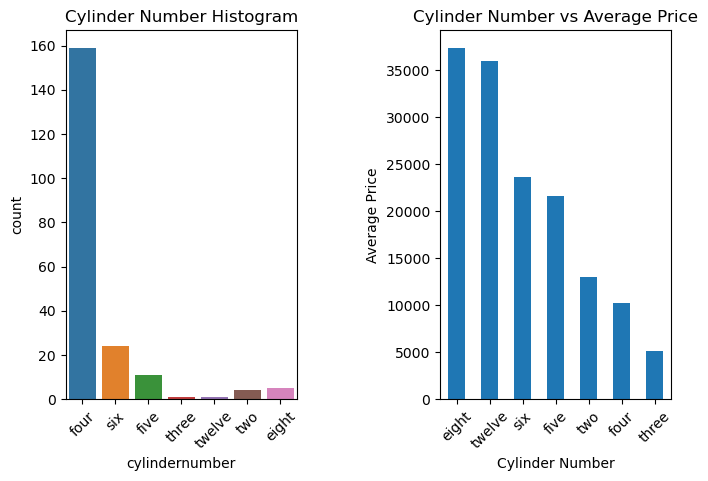

In [42]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cylinder Number Histogram')
sns.countplot(cars.cylindernumber)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df = cars.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False)
ax = df.plot(kind="bar", figsize=(8,6))
ax.set_title('Cylinder Number vs Average Price')
ax.set_xlabel('Cylinder Number')
ax.set_ylabel('Average Price')
plt.xticks(rotation=45)

fig.tight_layout(pad = 5.0)
plt.show()

### Observation:
#### 1. Most common number of cylinders are four, five and six. And four cylinder car is the most preferred one.
#### 2. Eight cylinders cars have the highest price range and three and four cylinders cars have low prices.

In [47]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'curbweight_interval'],
      dtype='object')

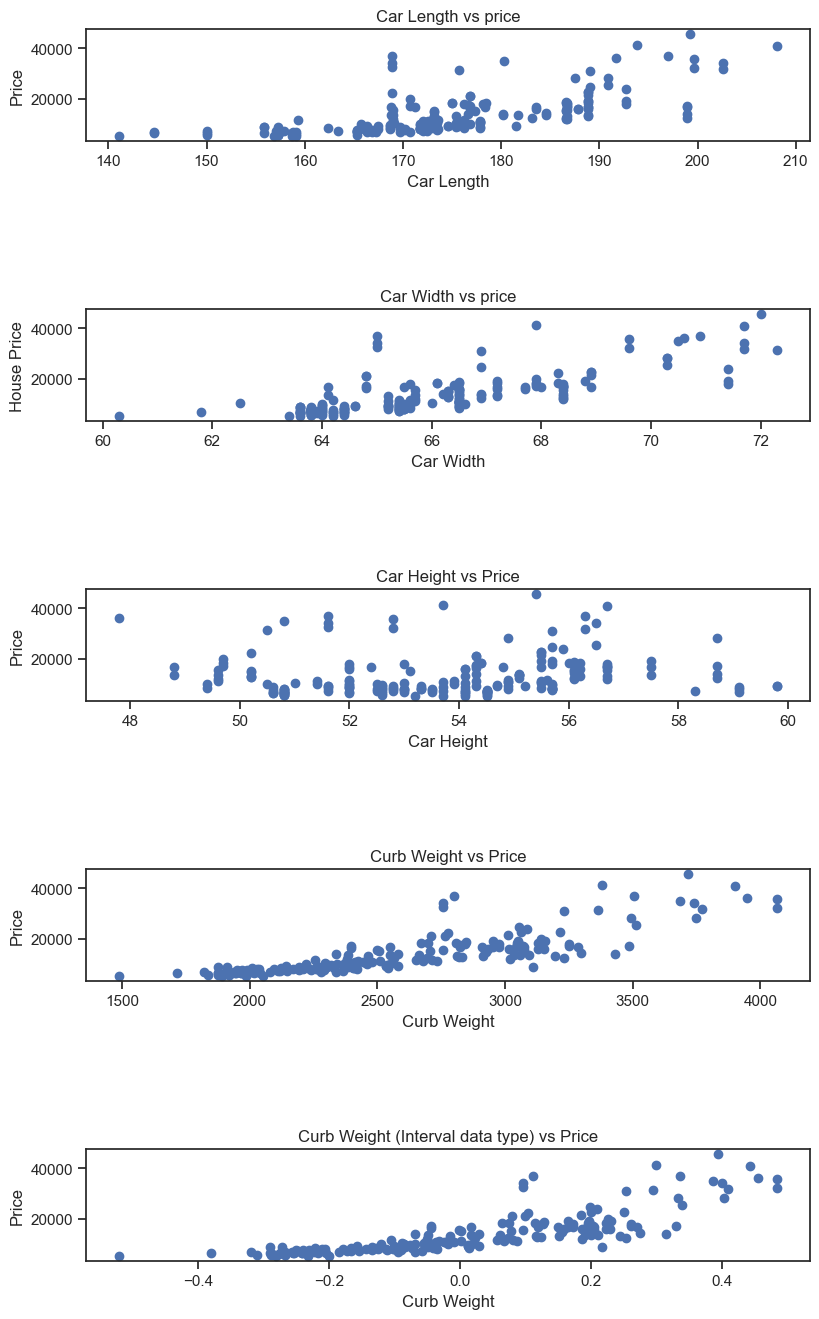

In [68]:
def scatter(x, fig):
    ax = fig.add_subplot(6, 2, fig)
    ax.scatter(cars[x], cars['price'])
    ax.set_title(x + ' vs Price')
    ax.set_xlabel(x)
    ax.set_ylabel('Price')

fig, ax = plt.subplots(5, figsize=(10, 15))

ax[0].set_title("Car Length vs price")
ax[0].scatter(x = cars['carlength'], y = cars['price'])
ax[0].set_xlabel("Car Length")
ax[0].set_ylabel("Price")

ax[1].scatter(x = cars['carwidth'], y = cars['price'])
ax[1].set_title('Car Width vs price')
ax[1].set_xlabel("Car Width")
ax[1].set_ylabel("House Price")

ax[2].scatter(x = cars['carheight'], y = cars['price'])
ax[2].set_title("Car Height vs Price")
ax[2].set_xlabel("Car Height")
ax[2].set_ylabel("Price")

ax[3].scatter(x = cars['curbweight'], y = cars['price'])
ax[3].set_title("Curb Weight vs Price")
ax[3].set_xlabel("Curb Weight")
ax[3].set_ylabel("Price")

ax[4].scatter(x = cars['curbweight_interval'], y = cars['price'])
ax[4].set_title("Curb Weight (Interval data type) vs Price")
ax[4].set_xlabel("Curb Weight")
ax[4].set_ylabel("Price")

fig.tight_layout(pad = 6.0)
plt.show()

### Observation:
#### 1. carwidth, carlength and curbweight show a positive correlation with price.
#### 2. carheight doesn't show any significant relation with price.
#### 3. Curb weight interval is interval data type derived from curb weight which is ratio data type originally. We can observe that there is no difference in the graphs of ratio data type and interval data type. 

[Text(0.5, 1.0, 'Relation between mileage and price')]

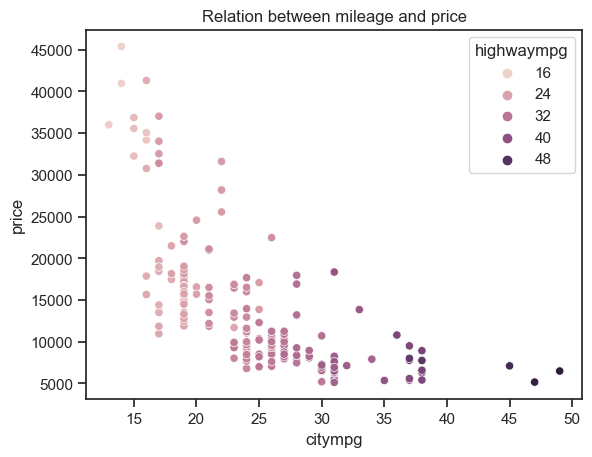

In [70]:
sns.scatterplot(x=cars.citympg, y=cars.price, hue=cars.highwaympg).set(title='Relation between mileage and price')


### Observation:
#### 1. As the price goes up the mileage is lesser in the city as well as on the highways when compared to lesser price cars. High end cars give lesser mileage.
#### 2. However, average mileage between 20 to 30 is given by cars on highways and in the city, with the price also being on the average side ranging between 5000 to 20000 dollars.

<Figure size 2500x600 with 0 Axes>

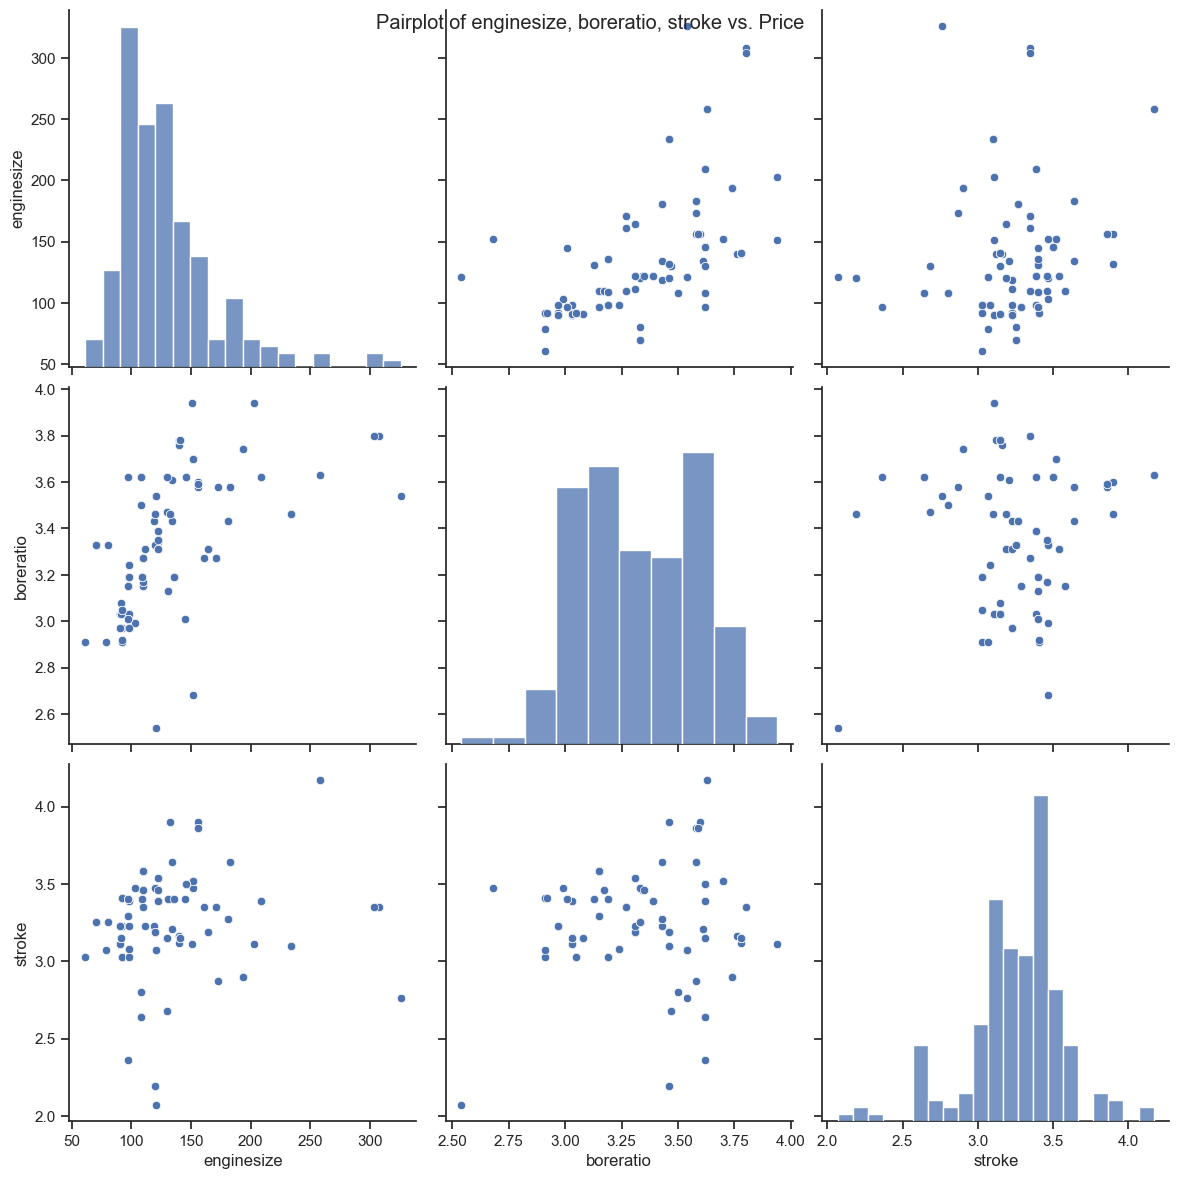

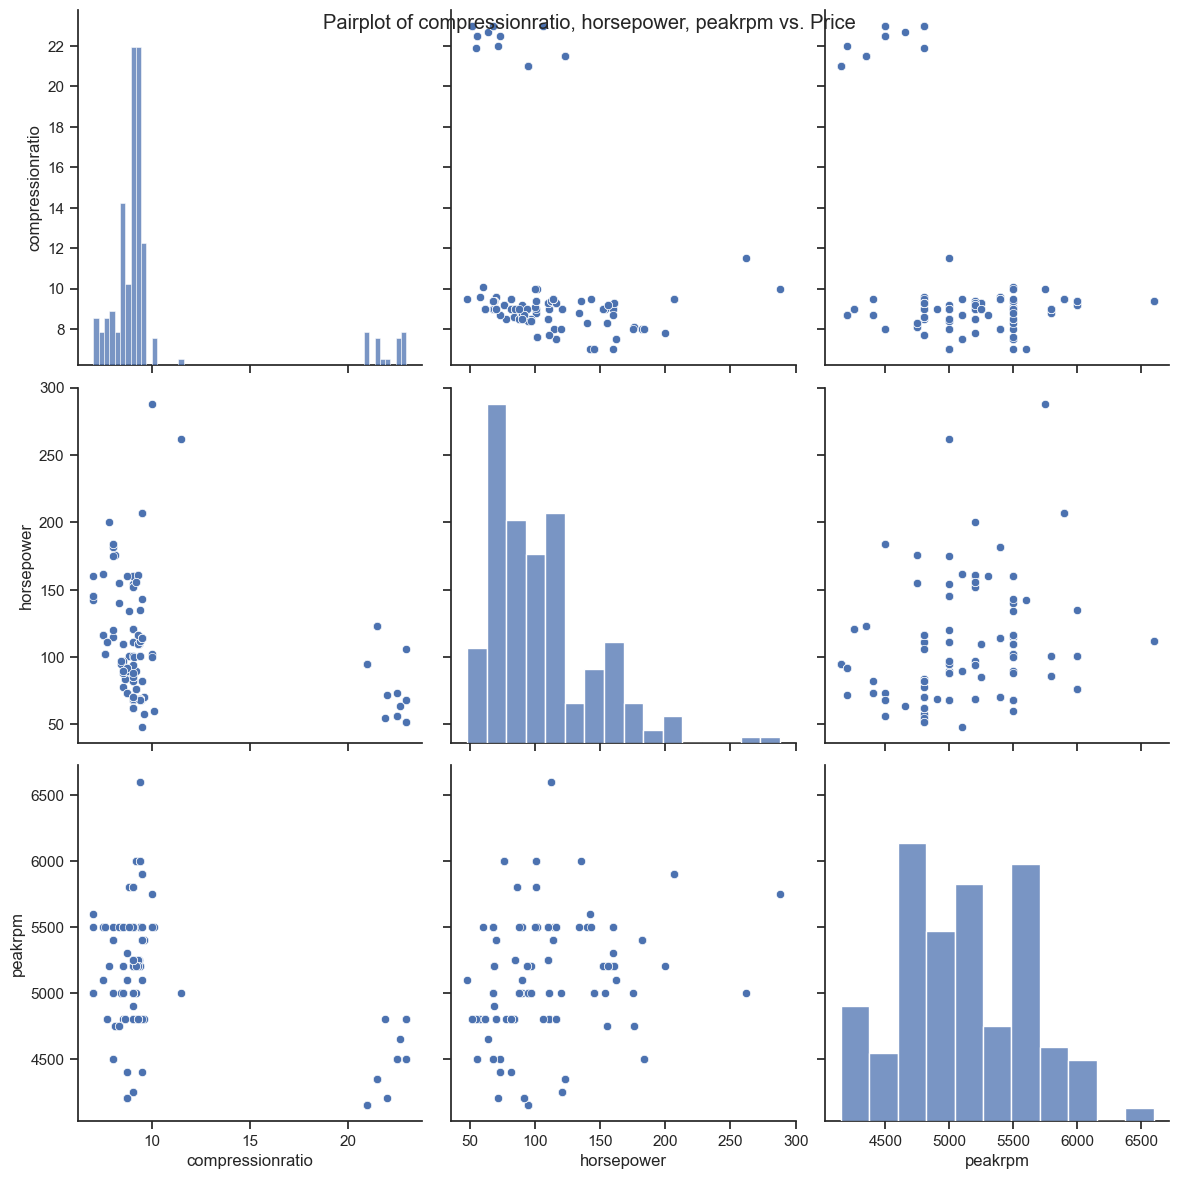

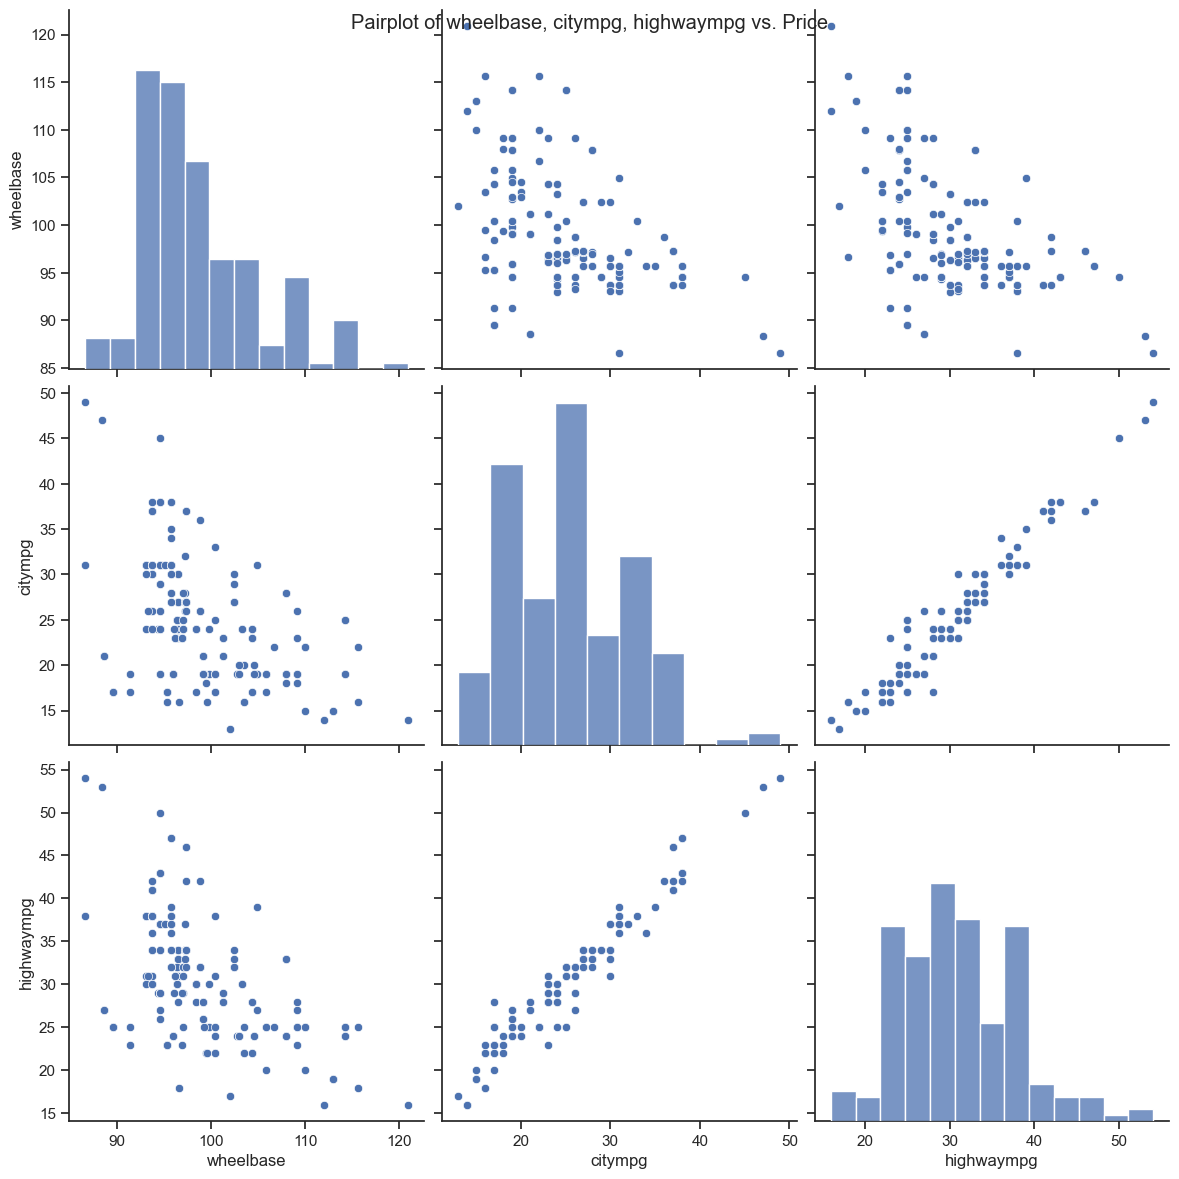

In [56]:
plt.figure(figsize=(25, 6))
def pp(x, y, z):
    sns.set(style='ticks')
    fig.tight_layout(pad = 5.0)
    sns.pairplot(data=cars, vars=[x, y, z], y_vars=['price'], height=4, aspect=1)
    plt.suptitle('Pairplot of ' + x + ', ' + y + ', ' + z + ' vs. Price')
    plt.show()
      
pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

### Observation:
#### 1. enginesize, boreratio, horsepower, wheelbase - have a significant positive correlation with price.
#### 2. citympg, highwaympg - have a significant negative correlation with price.

<Figure size 2500x600 with 0 Axes>

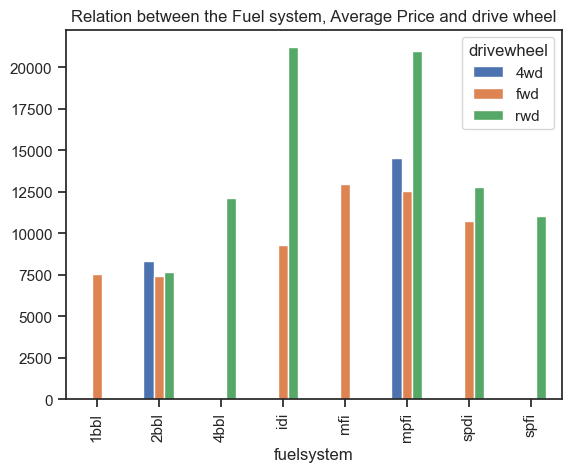

In [58]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Relation between the Fuel system, Average Price and drive wheel')
plt.show()

### Observation:
#### 1. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

### Most Significant Columns

In [59]:
car_final = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]

###  Graphs for significant features vs price

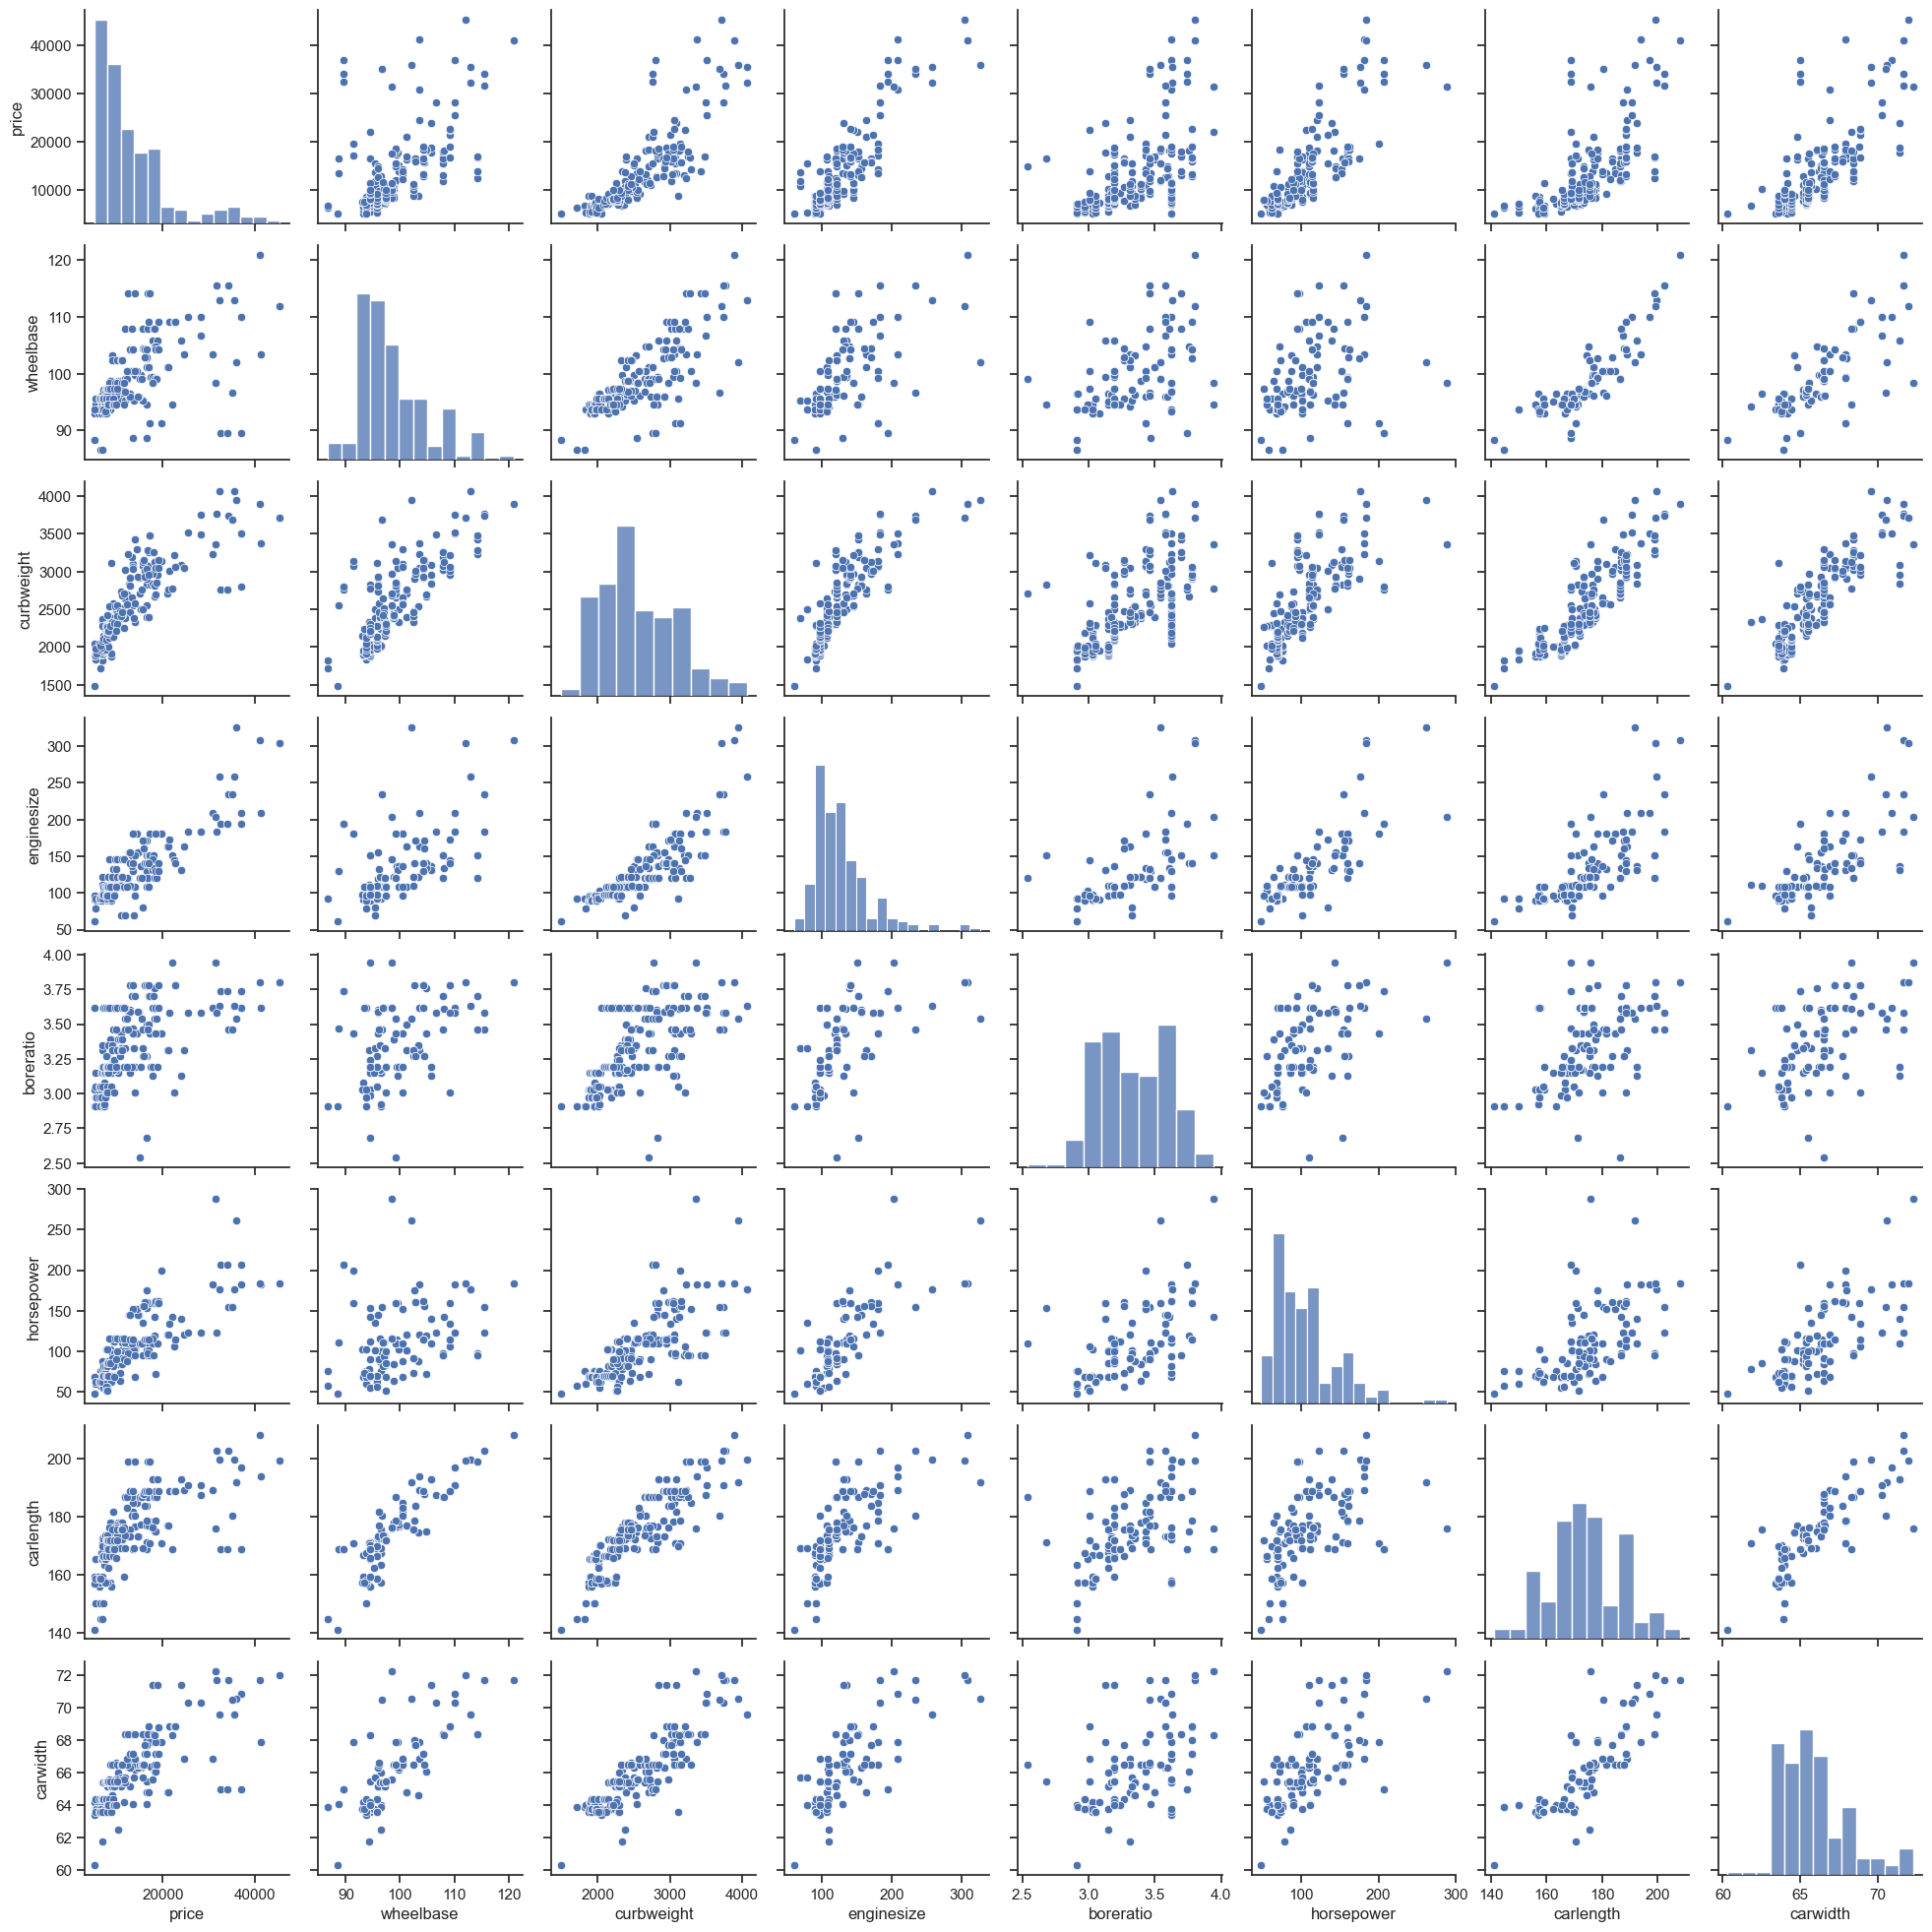

In [72]:
sns.pairplot(car_final)
plt.show()

### Splitting numeric and categorical data 

In [73]:
car_final_quant = car_final[car_final.select_dtypes(include=[np.number]).columns.tolist()]
car_final_quant.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4


In [74]:
car_final_qual = car_final[car_final.select_dtypes(include=['object']).columns.tolist()]
car_final_qual.head()

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
0,gas,std,convertible,rwd,dohc,four
1,gas,std,convertible,rwd,dohc,four
2,gas,std,hatchback,rwd,ohcv,six
3,gas,std,sedan,fwd,ohc,four
4,gas,std,sedan,4wd,ohc,five


### Converting categorical variables to numeric variables 

In [75]:
car_final_qual = pd.get_dummies(car_final_qual)
car_final_qual.head(5)

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


### Concatenated the actual numeric data and converted numeric data

In [76]:
carsProssed = pd.concat([car_final_quant,car_final_qual], axis=1) 
carsProssed.head(5)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_diesel,fueltype_gas,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,0,1,...,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,0,1,...,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,0,1,...,0,0,0,0,1,0,0,0,0,0


### Correlation using heatmap 

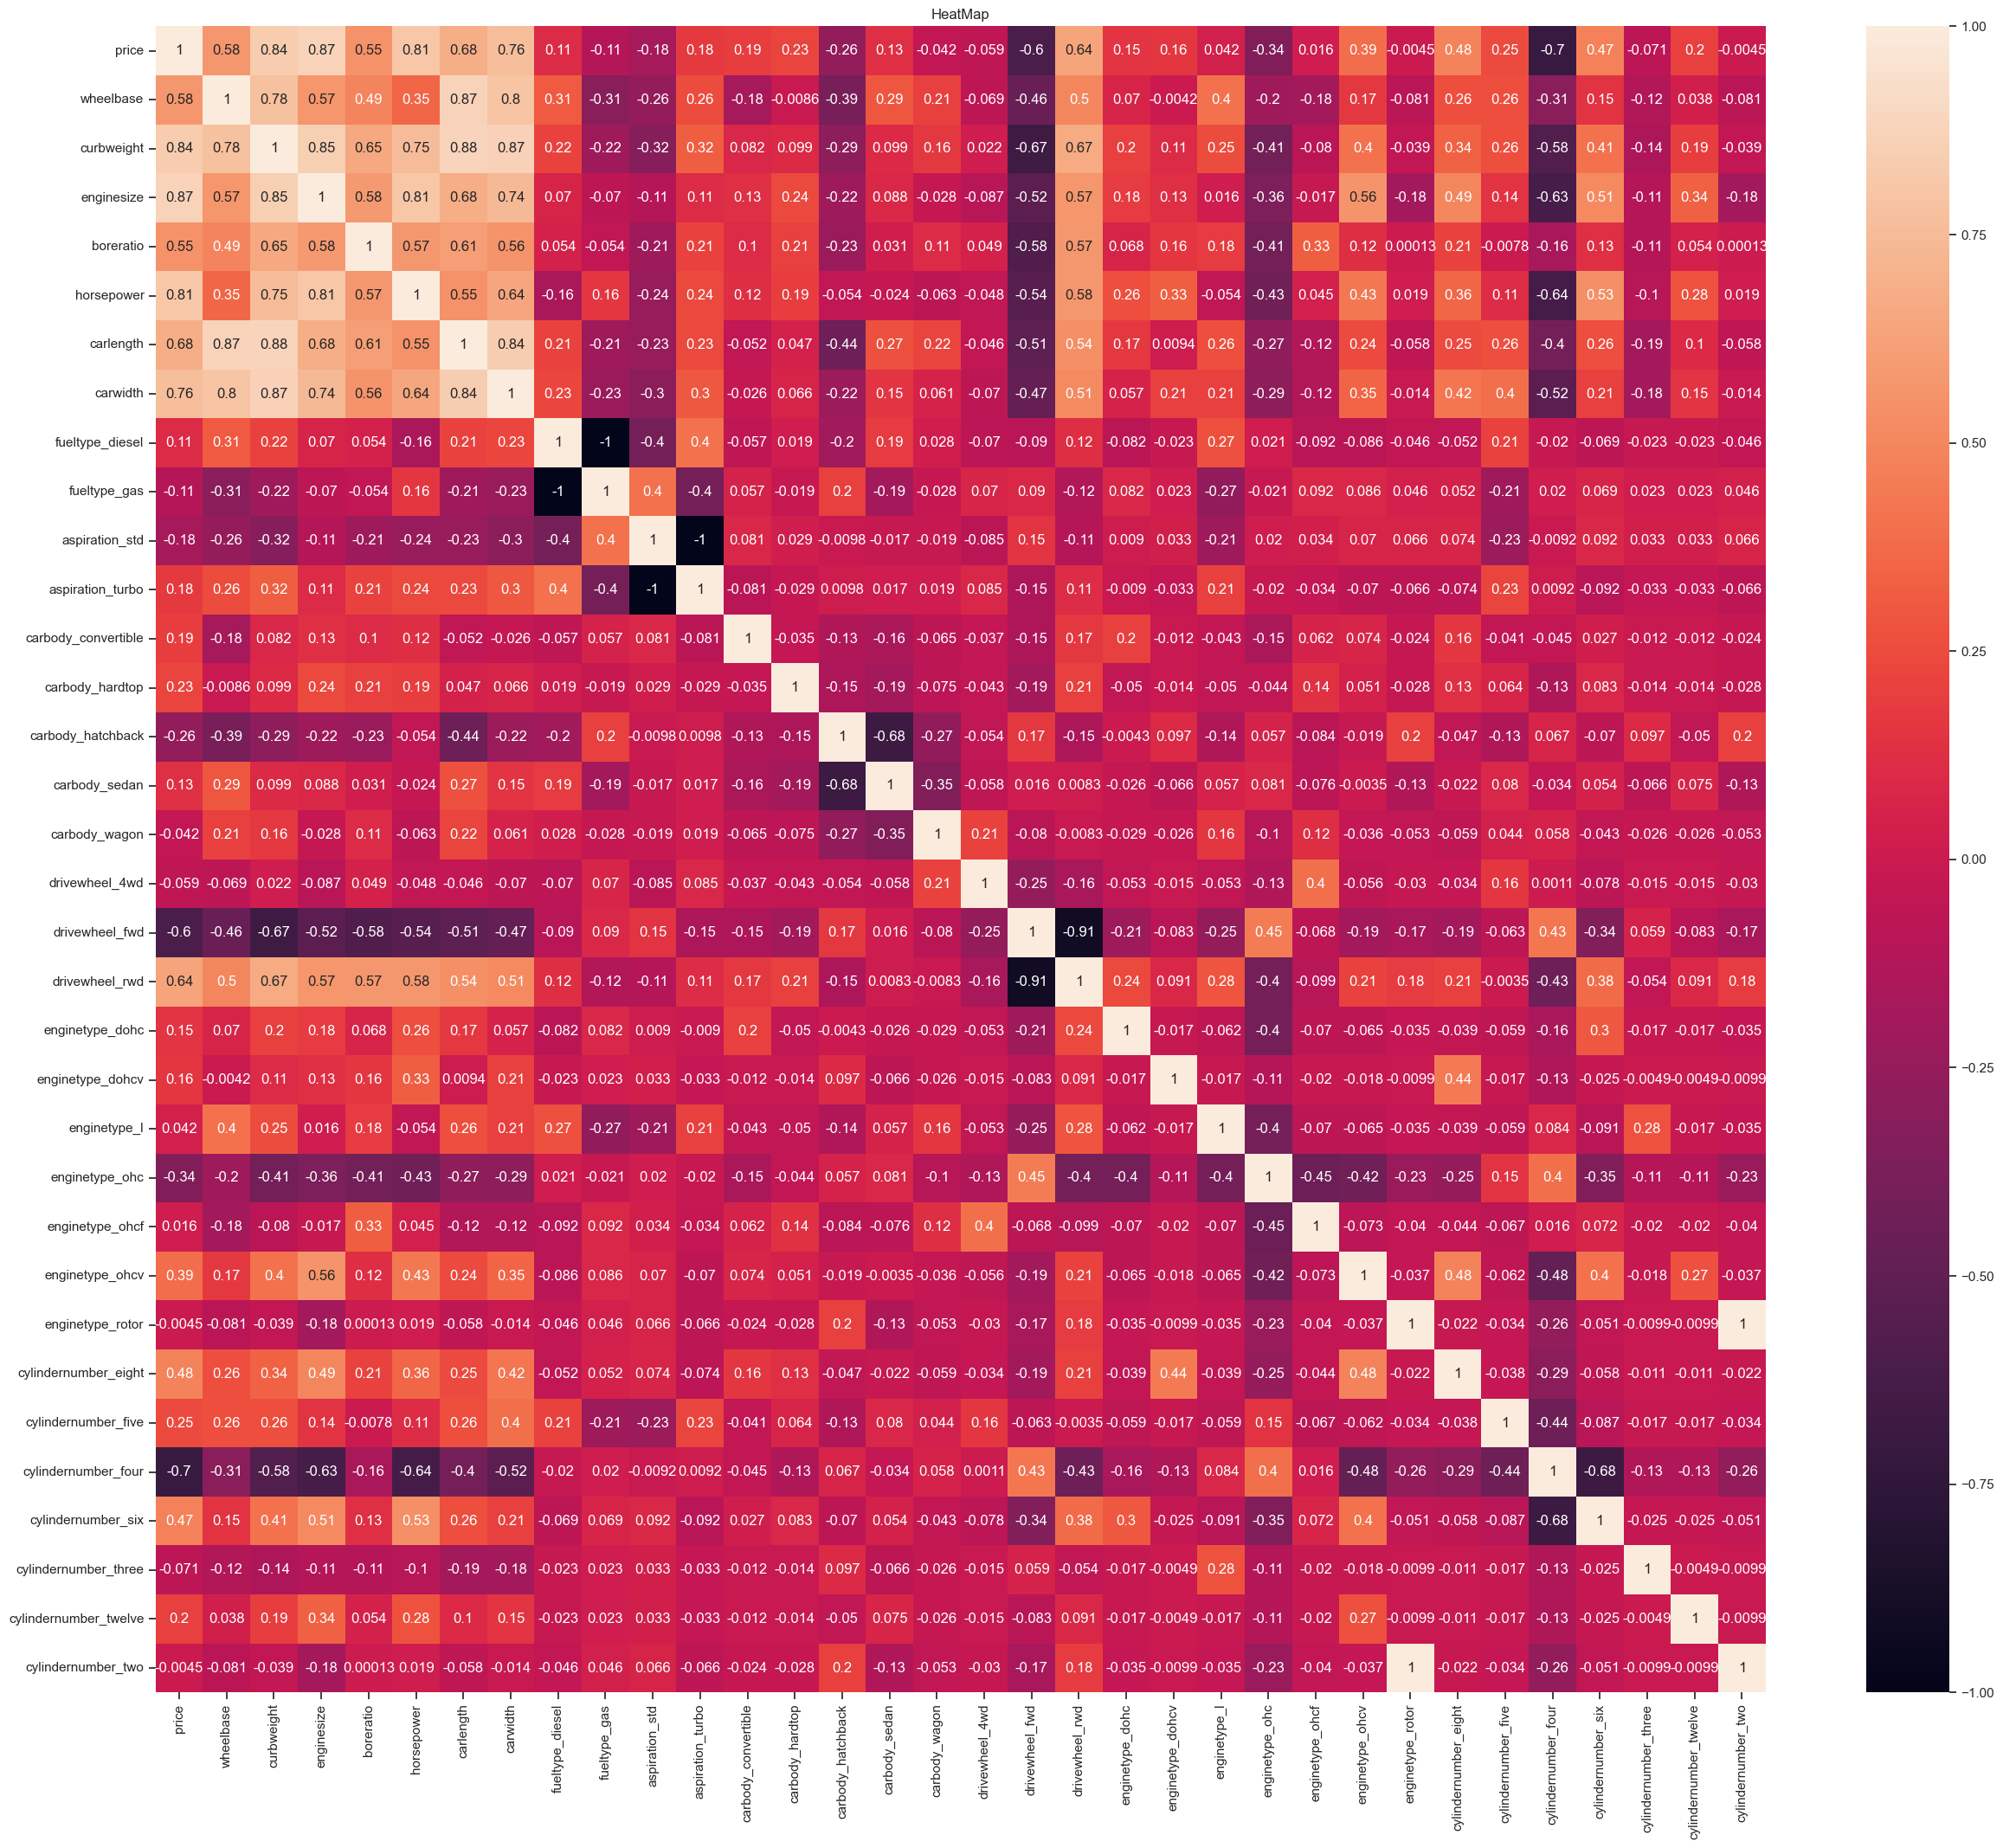

In [79]:
plt.figure(figsize = (30, 25))
sns.heatmap(carsProssed.corr(), annot = True).set(title = "HeatMap")
plt.show()

#### The above Heatmap shows the correlation of every feature(column) with price, to understand how closely it is related with that of price. Its measures on a scale of -1 to 1, where -1 being least correlated and 1 being highly related.

In [80]:
y = carsProssed['price']
X = carsProssed.drop(['price'],axis=1)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Model Training

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred = lr.predict(X_test)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8733182974901593

### Computing MSE, RMSE and R squared values

In [92]:
from sklearn.metrics import mean_squared_error

# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, y_pred)
lin_rmse1 = np.sqrt(lin_mse1)
print("Root mean squared value:",lin_rmse1)

# R squared value
r2_lin_test1=lr.score(X_test,y_test)
r2_lin_train1=lr.score(X_train,y_train)
print("Training Accuracy:",r2_lin_train1)
print("Testing Accuracy:", r2_lin_test1)

Root mean squared value: 2978.4904169032243
Training Accuracy: 0.9174040074084739
Testing Accuracy: 0.8733182974901593
